Here, $\gamma_n$ is turned on, $\gamma_4$, $\gamma_3$, $\Delta_{AB}$ turned off

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import make_grid
from blg_strain.microscopic import feq_func
from blg_strain.utils.const import muB, q, hbar, a0

In [4]:
from matplotlib import colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        v = max(abs(self.vmin), abs(self.vmax))/2
        x, y = [-v, self.vcenter, v], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
norm = MidpointNormalize(vcenter=0)

In [63]:
Delta = 0.01
eps = 0.01
theta = np.pi/2

In [64]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands

In [65]:
sl = StrainedLattice(eps, theta, turn_off=['gamma3', 'gamma4', 'DeltaAB'])

In [66]:
bs = BandStructure(sl, Delta=Delta)
bs.calculate(500,500)

In [67]:
fb = FilledBands(bs, EF=0.0075, T=1)
fb.calculate()

In [68]:
kx = bs.K.kxa
ky = bs.K.kya
Kx, Ky = bs.K.Kxa, bs.K.Kya

In [69]:
EF = 0.0125
T = 1
f = feq_func(bs.K.E, EF, T)
f2 = feq_func(bs.Kp.E, EF, T)

fx, fy = np.gradient(f * a0, kx, ky, axis=(-2, -1)) # kx is actually kxa
fx2, fy2 = np.gradient(f2 * a0, kx, ky, axis=(-2, -1))

In [70]:
n=2

In [71]:
Omega = bs.K.Omega
Omega2 = bs.Kp.Omega

Mu = bs.K.Mu
Mu2 = bs.Kp.Mu

E = bs.K.E
E2 = bs.Kp.E

<IPython.core.display.Javascript object>


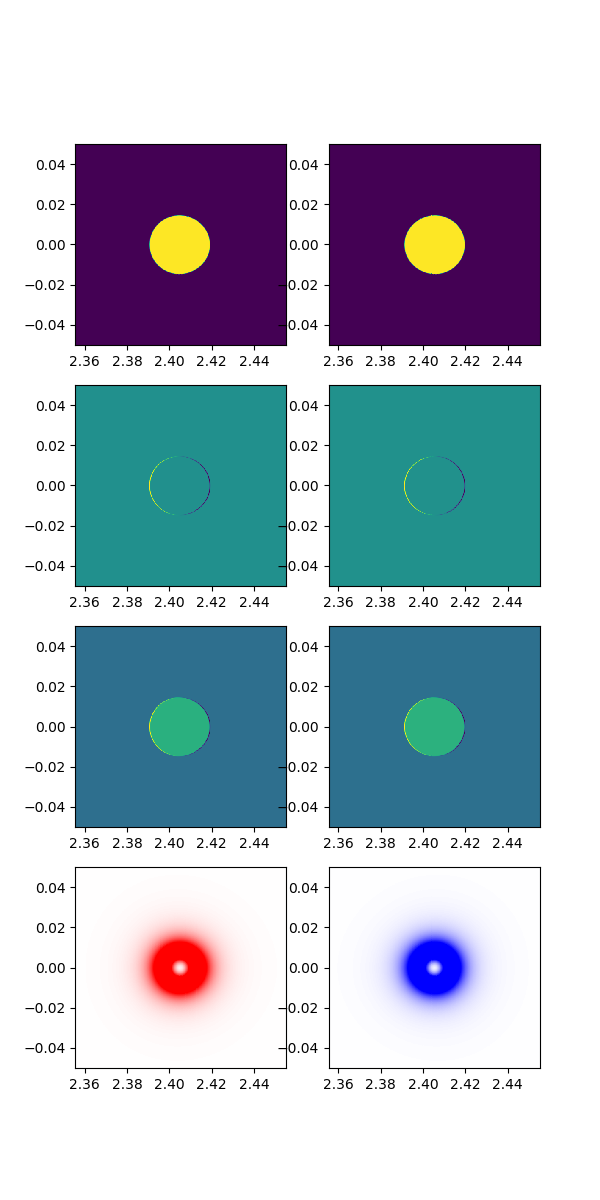

In [72]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(6,12))

ax[0,0].pcolormesh(Kx, Ky, f[n])
ax[0,1].pcolormesh(Kx, Ky, f2[n])

ax[1,0].pcolormesh(Kx, Ky, fx[n])
ax[1,1].pcolormesh(Kx, Ky, fx2[n])

a=5e6
ax[2,0].pcolormesh(Kx, Ky, f[n] + a*fx[n])
ax[2,1].pcolormesh(Kx, Ky, f2[n] + a*fx2[n])

ax[-1,0].pcolormesh(Kx, Ky, Omega[n], cmap='bwr', norm=norm)
ax[-1,1].pcolormesh(Kx, Ky, Omega2[n], cmap='bwr', norm=norm)

### Flip K' valley over x
For any function $g(x)$, the integral $\int_a^b dx\,g(x)$ is equivalent to $\int_{-b}^{-a} dx\, g(-x)$. For limits $a=-b$, this becomes $\int_a^b dx\, g(-x)$.

The magnetization is an integral roughly $\propto \int dk_x f(\mathbf k)\Omega(\mathbf k)$. From the above, if the limits of integration are symmetric around zero, this integral is equivalent to $\int dk_x f(-\mathbf k)\Omega(-\mathbf k)$.

In [73]:
f2p = f2[:, ::-1, :]
fx2p = fx2[:, ::-1, :]
Omega2p = Omega2[:, ::-1, :]

fo = f*Omega
fxo = fx*Omega

fo2 = f2p*Omega2p
fxo2 = fx2p * Omega2p

In [74]:
def pcolormesh(ax, data, vmin, vmax):
    ax.pcolormesh(Kx, Ky, data, cmap='bwr', vmin=vmin, vmax=vmax)

<IPython.core.display.Javascript object>


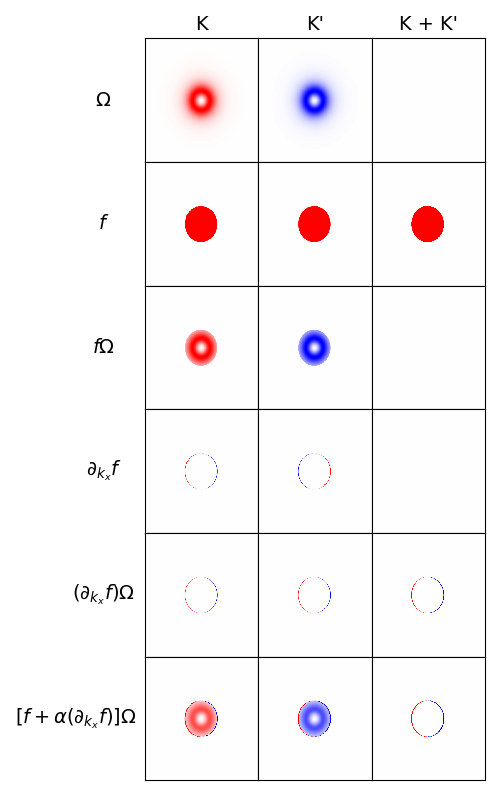

In [75]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(5,8))

v = abs( Omega[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[0,0], Omega[n], vmin, vmax)
pcolormesh(ax[0,1], Omega2p[n], vmin, vmax)
pcolormesh(ax[0,2], Omega[n] + Omega2p[n], vmin, vmax)

v = abs(f[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[1,0], f[n], vmin, vmax)
pcolormesh(ax[1,1], f2p[n], vmin, vmax)
pcolormesh(ax[1,2], f[n] + f2p[n], vmin, vmax)

v = abs(fo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[2,0], fo[n], vmin, vmax)
pcolormesh(ax[2,1], fo2[n], vmin, vmax)
pcolormesh(ax[2,2], fo[n] + fo2[n], vmin, vmax)

v = abs(fx[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[3,0], fx[n], vmin, vmax)
pcolormesh(ax[3,1], fx2p[n], vmin, vmax)
pcolormesh(ax[3,2], fx[n] + fx2p[n], vmin, vmax)

v = abs(fxo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[4,0], fxo[n], vmin, vmax)
pcolormesh(ax[4,1], fxo2[n], vmin, vmax)
pcolormesh(ax[4,2], fxo[n]+ fxo2[n], vmin, vmax)

a=50e6
v = abs(fo[n] + a*fxo[n]).max()/4
vmin, vmax = -v, v
pcolormesh(ax[5,0], fo[n] + a*fxo[n], vmin, vmax)
pcolormesh(ax[5,1], fo2[n] + a*fxo2[n], vmin, vmax)
pcolormesh(ax[5,2], fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n], vmin, vmax)


for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0,0].set_title('K', fontsize=14)
ax[0,1].set_title('K\'', fontsize=14)
ax[0,2].set_title('K + K\'', fontsize=14)

ax[0,0].set_ylabel(r'$\Omega$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[1,0].set_ylabel(r'$f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[2,0].set_ylabel(r'$f \Omega$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[3,0].set_ylabel(r'$\partial_{k_x} f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[4,0].set_ylabel(r'$(\partial_{k_x} f) \Omega$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[5,0].set_ylabel(r'$[f + \alpha (\partial_{k_x} f)]\Omega$', rotation=0, labelpad=50, fontsize=14, va='center')



plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
# fig.savefig('Fermi_surface_Omega.png', bbox_inches='tight')

# Include all terms in integrand

In [76]:
f2p = f2[:, ::-1, :]
fx2p = fx2[:, ::-1, :]
Omega2p = Omega2[:, ::-1, :]
Mu2p = Mu2[:, ::-1, :]
E2p = E2[:, ::-1, :]

I = (Mu + q*Omega/hbar * (EF - E)) 
Ip = (Mu2p + q*Omega2p/hbar * (EF - E2p))

fo = f*I
fxo = fx*I

fo2 = f2p*Ip
fxo2 = fx2p * Ip

In [77]:
def pcolormesh(ax, data, vmin, vmax):
    ax.pcolormesh(Kx, Ky, data, cmap='bwr', vmin=vmin, vmax=vmax)

<IPython.core.display.Javascript object>


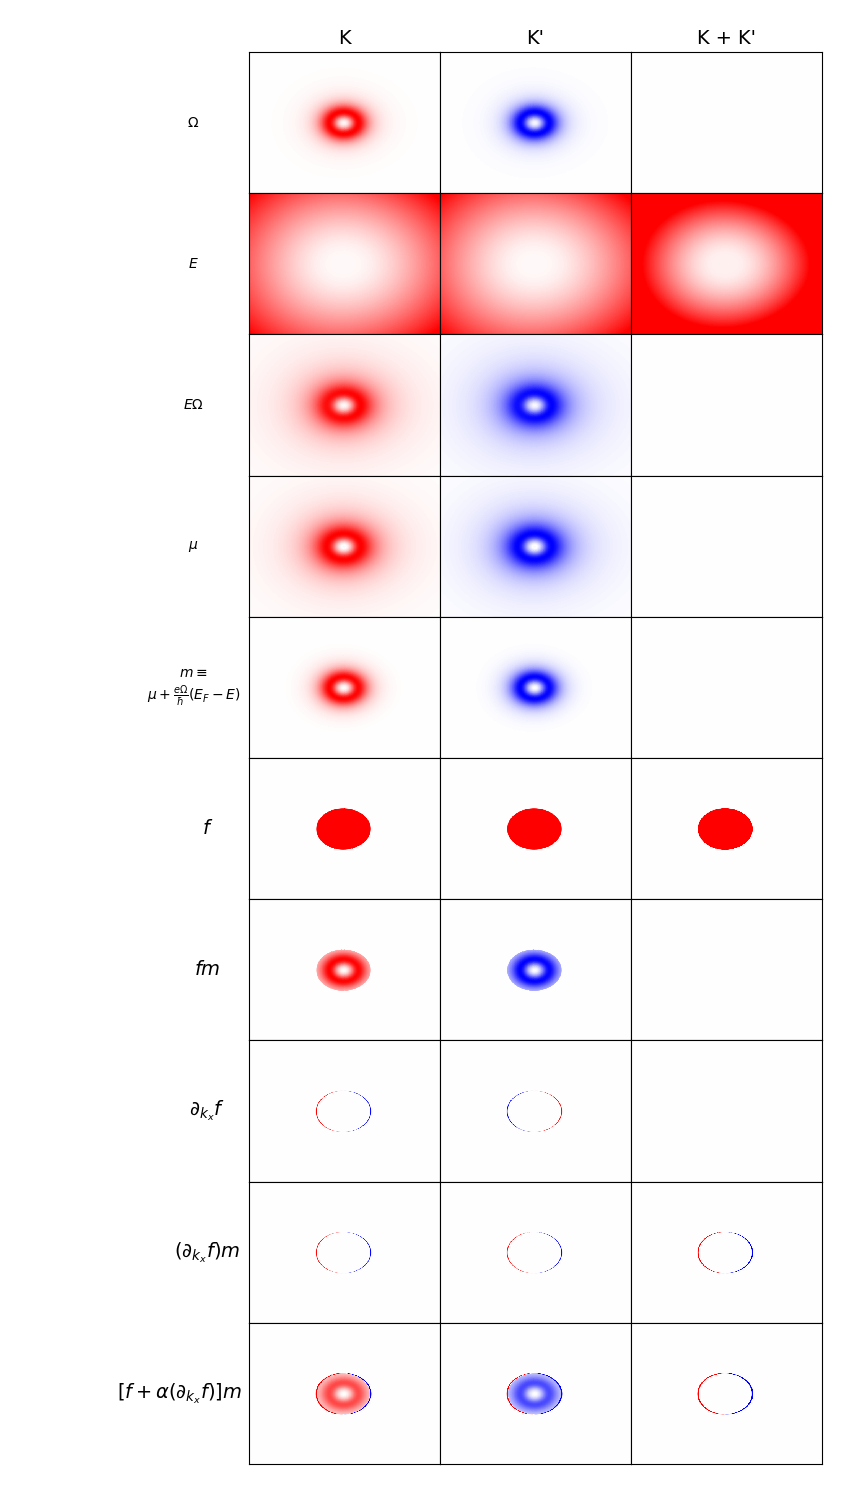

In [78]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(5,11))

v = abs(Omega[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[0,0], Omega[n], vmin, vmax)
pcolormesh(ax[0,1], Omega2p[n], vmin, vmax)
pcolormesh(ax[0,2], Omega[n] + Omega2p[n], vmin, vmax)

v = abs(EF- E2[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[1,0], E[n], vmin, vmax)
pcolormesh(ax[1,1], E2p[n], vmin, vmax)
pcolormesh(ax[1,2], E[n] + E2p[n], vmin, vmax)

v = abs( E[n] * Omega[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[2,0], E[n] * Omega[n], vmin, vmax)
pcolormesh(ax[2,1], E2p[n]* Omega2p[n], vmin, vmax)
pcolormesh(ax[2,2], E[n]* Omega[n] + E2p[n]* Omega2p[n], vmin, vmax)

v = abs( Mu2[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[3,0], Mu[n], vmin, vmax)
pcolormesh(ax[3,1], Mu2p[n], vmin, vmax)
pcolormesh(ax[3,2], Mu[n] + Mu2p[n], vmin, vmax)

v = abs( I[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[4,0], I[n], vmin, vmax)
pcolormesh(ax[4,1], Ip[n], vmin, vmax)
pcolormesh(ax[4,2], I[n] + Ip[n], vmin, vmax)

v = abs(f[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[5,0], f[n], vmin, vmax)
pcolormesh(ax[5,1], f2p[n], vmin, vmax)
pcolormesh(ax[5,2], f[n] + f2p[n], vmin, vmax)

v = abs(fo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[6,0], fo[n], vmin, vmax)
pcolormesh(ax[6,1], fo2[n], vmin, vmax)
pcolormesh(ax[6,2], fo[n] + fo2[n], vmin, vmax)

v = abs(fx[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[7,0], fx[n], vmin, vmax)
pcolormesh(ax[7,1], fx2p[n], vmin, vmax)
pcolormesh(ax[7,2], fx[n] + fx2p[n], vmin, vmax)

v = abs(fxo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[8,0], fxo[n], vmin, vmax)
pcolormesh(ax[8,1], fxo2[n], vmin, vmax)
pcolormesh(ax[8,2], fxo[n]+ fxo2[n], vmin, vmax)

a=50e6
v = abs(fo[n] + a*fxo[n]).max()/4
vmin, vmax = -v, v
pcolormesh(ax[9,0], fo[n] + a*fxo[n], vmin, vmax)
pcolormesh(ax[9,1], fo2[n] + a*fxo2[n], vmin, vmax)
pcolormesh(ax[9,2], fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n], vmin, vmax)


for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0,0].set_title('K', fontsize=14)
ax[0,1].set_title('K\'', fontsize=14)
ax[0,2].set_title('K + K\'', fontsize=14)

ax[0,0].set_ylabel(r'$\Omega$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[1,0].set_ylabel(r'$E$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[2,0].set_ylabel(r'$E\Omega$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[3,0].set_ylabel(r'$\mu$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[4,0].set_ylabel(r'$m \equiv$' '\n' r'$\mu + \frac{e\Omega}{\hbar}(E_F-E)$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[5,0].set_ylabel(r'$f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[6,0].set_ylabel(r'$f m$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[7,0].set_ylabel(r'$\partial_{k_x} f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[8,0].set_ylabel(r'$(\partial_{k_x} f) m$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[9,0].set_ylabel(r'$[f + \alpha (\partial_{k_x} f)]m$', rotation=0, labelpad=50, fontsize=14, va='center')



plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig('Fermi_surface.png', bbox_inches='tight')

In [79]:
fb.alpha

array([ 2.4765073e-05, -4.6299748e-18])

Can we visualize the nonzero part? Bottom right plot

<IPython.core.display.Javascript object>


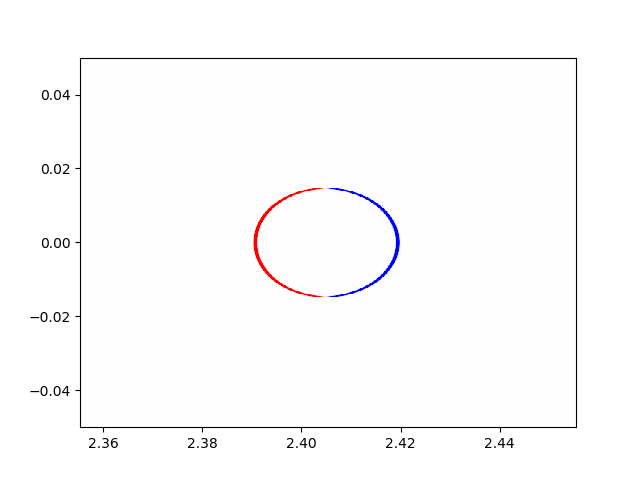

In [81]:
fig, ax = plt.subplots()
a=50e6
v = abs(fo[n] + a*fxo[n]).max()/4
vmin, vmax = -v, v
Z = fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n]
pcolormesh(ax, Z, vmin, vmax)

<IPython.core.display.Javascript object>


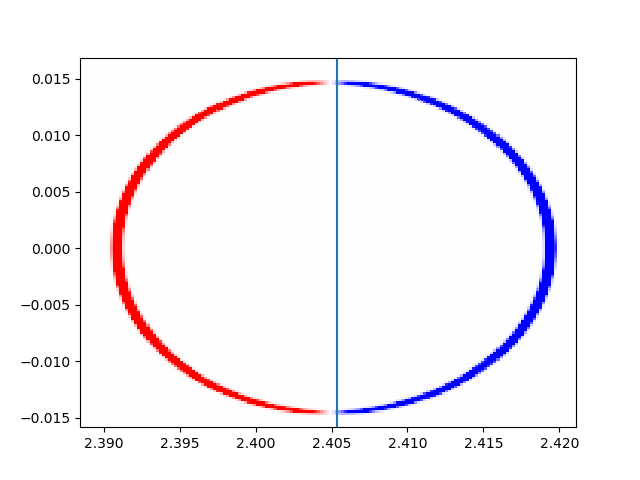

In [95]:
fig, ax = plt.subplots()
a=50e6
v = abs(fo[n] + a*fxo[n]).max()/4
vmin, vmax = -v, v
Z = fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n]
pcolormesh(ax, Z, vmin, vmax)
ax.axvline(sl.K[0])

In [93]:
sl.K

array([ 2.40537415e+00, -7.74411890e-09])

<IPython.core.display.Javascript object>


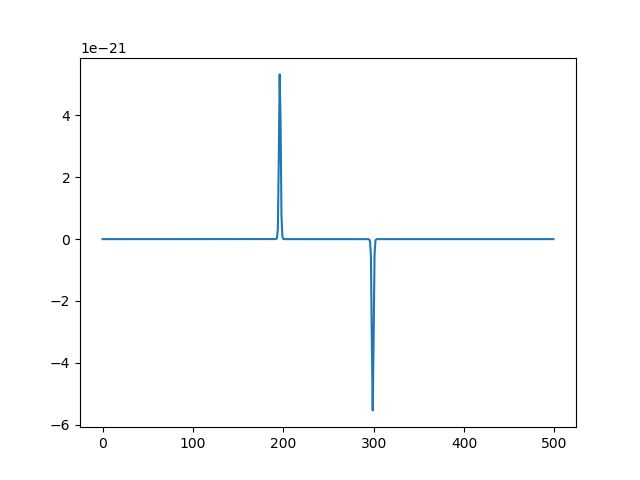

In [90]:
fig, ax = plt.subplots()
ax.plot(Z[:,300])